# Yulu business case : Hypothesistesting

**About Yulu**

Yulu is India’s leading micro-mobility service provider, which offers unique vehicles for the daily commute. Starting off as a mission to eliminate traffic congestion in India, Yulu provides the safest commute solution through a user-friendly mobile app to enable shared, solo and sustainable commuting.

Yulu zones are located at all the appropriate locations (including metro stations, bus stands, office spaces, residential areas, corporate offices, etc) to make those first and last miles smooth, affordable, and convenient!

Yulu has recently suffered considerable dips in its revenues. They have contracted a consulting company to understand the factors on which the demand for these shared electric cycles depends. Specifically, they want to understand the factors affecting the demand for these shared electric cycles in the Indian market.

**Business problem:**

The company wants to know:

Which variables are significant in predicting the demand for shared electric cycles in the Indian market?
How well those variables describe the electric cycle demands

So finding which variables majorily influence the demand for electric cycles is the task.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("Yulu.csv")

In [ ]:
df

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


Exploratory data analysis like checking for outliers and missing values if any

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [ ]:
for column in df.columns:
  unique_values = df[column].nunique()
  print(column, ":", unique_values)

datetime : 10886
season : 4
holiday : 2
workingday : 2
weather : 4
temp : 49
atemp : 60
humidity : 89
windspeed : 28
casual : 309
registered : 731
count : 822


In [ ]:
df.isna().isna().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [ ]:
df.shape

(10886, 12)

In [ ]:
summary = df.describe()
summary

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


Text(0.5, 1.0, 'Outliers of windspeed')

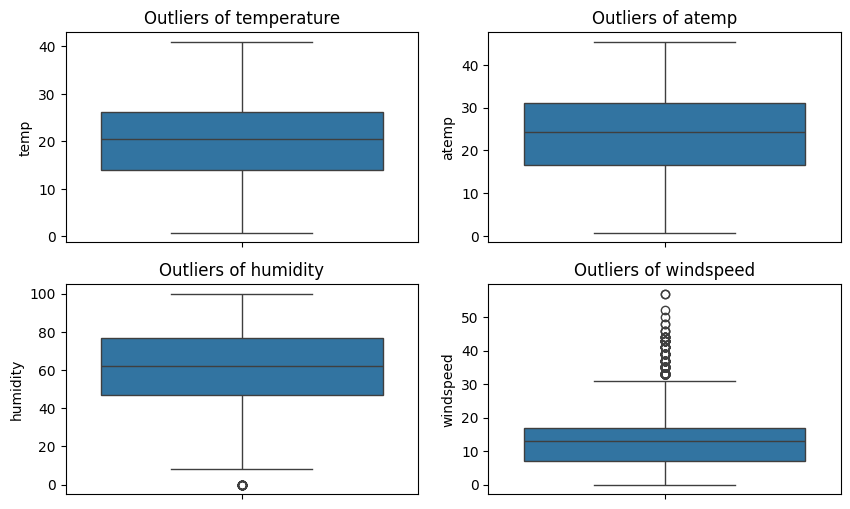

In [ ]:
plt.figure(figsize = (10, 6))
plt.subplot(2,2,1)
sns.boxplot(data = df.temp)
plt.title("Outliers of temperature")

plt.subplot(2,2,2)
sns.boxplot(data = df.atemp)
plt.title("Outliers of atemp")

plt.subplot(2,2,3)
sns.boxplot(data = df.humidity)
plt.title("Outliers of humidity")

plt.subplot(2,2,4)
sns.boxplot(data = df.windspeed)
plt.title("Outliers of windspeed")


Setting boundaries to count for total outliers

In [ ]:
Q1 = summary[["humidity", "windspeed"]].loc["25%"]
Q3 = summary[["humidity", "windspeed"]].loc["75%"]

IQR = Q3 - Q1
print(IQR)

humidity     30.0000
windspeed     9.9964
dtype: float64


In [ ]:
lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR

bounds_df = pd.DataFrame({"LowerBound" : lower_bound, "UpperBound": upper_bound})
print(bounds_df)

           LowerBound  UpperBound
humidity       2.0000    122.0000
windspeed     -7.9931     31.9925


In [ ]:
humidity_outliers = df[(df["humidity"] < lower_bound["humidity"]) | (df["humidity"] > upper_bound["humidity"])]
humidity_outliers

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
1091,2011-03-10 00:00:00,1,0,1,3,13.94,15.910,0,16.9979,3,0,3
1092,2011-03-10 01:00:00,1,0,1,3,13.94,15.910,0,16.9979,0,2,2
1093,2011-03-10 02:00:00,1,0,1,3,13.94,15.910,0,16.9979,0,1,1
1094,2011-03-10 05:00:00,1,0,1,3,14.76,17.425,0,12.9980,1,2,3
1095,2011-03-10 06:00:00,1,0,1,3,14.76,16.665,0,22.0028,0,12,12
1096,2011-03-10 07:00:00,1,0,1,3,15.58,19.695,0,15.0013,1,36,37
1097,2011-03-10 08:00:00,1,0,1,3,15.58,19.695,0,19.0012,1,43,44
1098,2011-03-10 09:00:00,1,0,1,3,16.40,20.455,0,15.0013,1,23,24
1099,2011-03-10 10:00:00,1,0,1,3,16.40,20.455,0,11.0014,0,17,17
1100,2011-03-10 11:00:00,1,0,1,3,16.40,20.455,0,16.9979,6,5,11


In [ ]:
windspeed_outliers = df[(df["windspeed"] < lower_bound["windspeed"]) | (df["windspeed"] > upper_bound["windspeed"])]
windspeed_outliers

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
175,2011-01-08 14:00:00,1,0,0,1,8.20,8.335,32,32.9975,12,83,95
178,2011-01-08 17:00:00,1,0,0,1,6.56,6.060,37,36.9974,5,64,69
194,2011-01-09 09:00:00,1,0,0,1,4.92,3.790,46,35.0008,0,19,19
196,2011-01-09 11:00:00,1,0,0,1,6.56,6.060,40,35.0008,2,47,49
265,2011-01-12 12:00:00,1,0,1,1,8.20,7.575,47,39.0007,3,52,55
...,...,...,...,...,...,...,...,...,...,...,...,...
10013,2012-11-02 14:00:00,4,0,1,2,16.40,20.455,40,32.9975,63,199,262
10154,2012-11-08 12:00:00,4,0,1,1,16.40,20.455,24,32.9975,33,202,235
10263,2012-11-13 01:00:00,4,0,1,3,18.04,21.970,88,43.0006,0,5,5
10540,2012-12-05 14:00:00,4,0,1,1,19.68,23.485,33,32.9975,39,179,218


Total_outliers count

In [ ]:
lower_outliers = (df[["humidity", "windspeed"]] < lower_bound).sum()
upper_outliers = (df[["humidity", "windspeed"]] > upper_bound).sum()

total_outliers = lower_outliers + upper_outliers

outliers_count = pd.DataFrame({"LowerBoundary_Outliers": lower_outliers, "UpperBoundary_Outliers": upper_outliers, "Total": total_outliers})
print(outliers_count)

           LowerBoundary_Outliers  UpperBoundary_Outliers  Total
humidity                       22                       0     22
windspeed                       0                     227    227


<--------------------------------------------------------------------------------------------> <-------------------------------------------------------------------------------------------->


(Univariate Representation)

1. illustration of Density plots for three important continuous variables in the dataset


*   The below plots define skewness of each variable


<ipython-input-43-df5b22a3e34e>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['temp'], shade=True, color='blue', label='Temperature')
<ipython-input-43-df5b22a3e34e>:16: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['humidity'], shade=True, color='green', label='Humidity')
<ipython-input-43-df5b22a3e34e>:27: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['windspeed'], shade=True, color='red', label='Wind Speed')


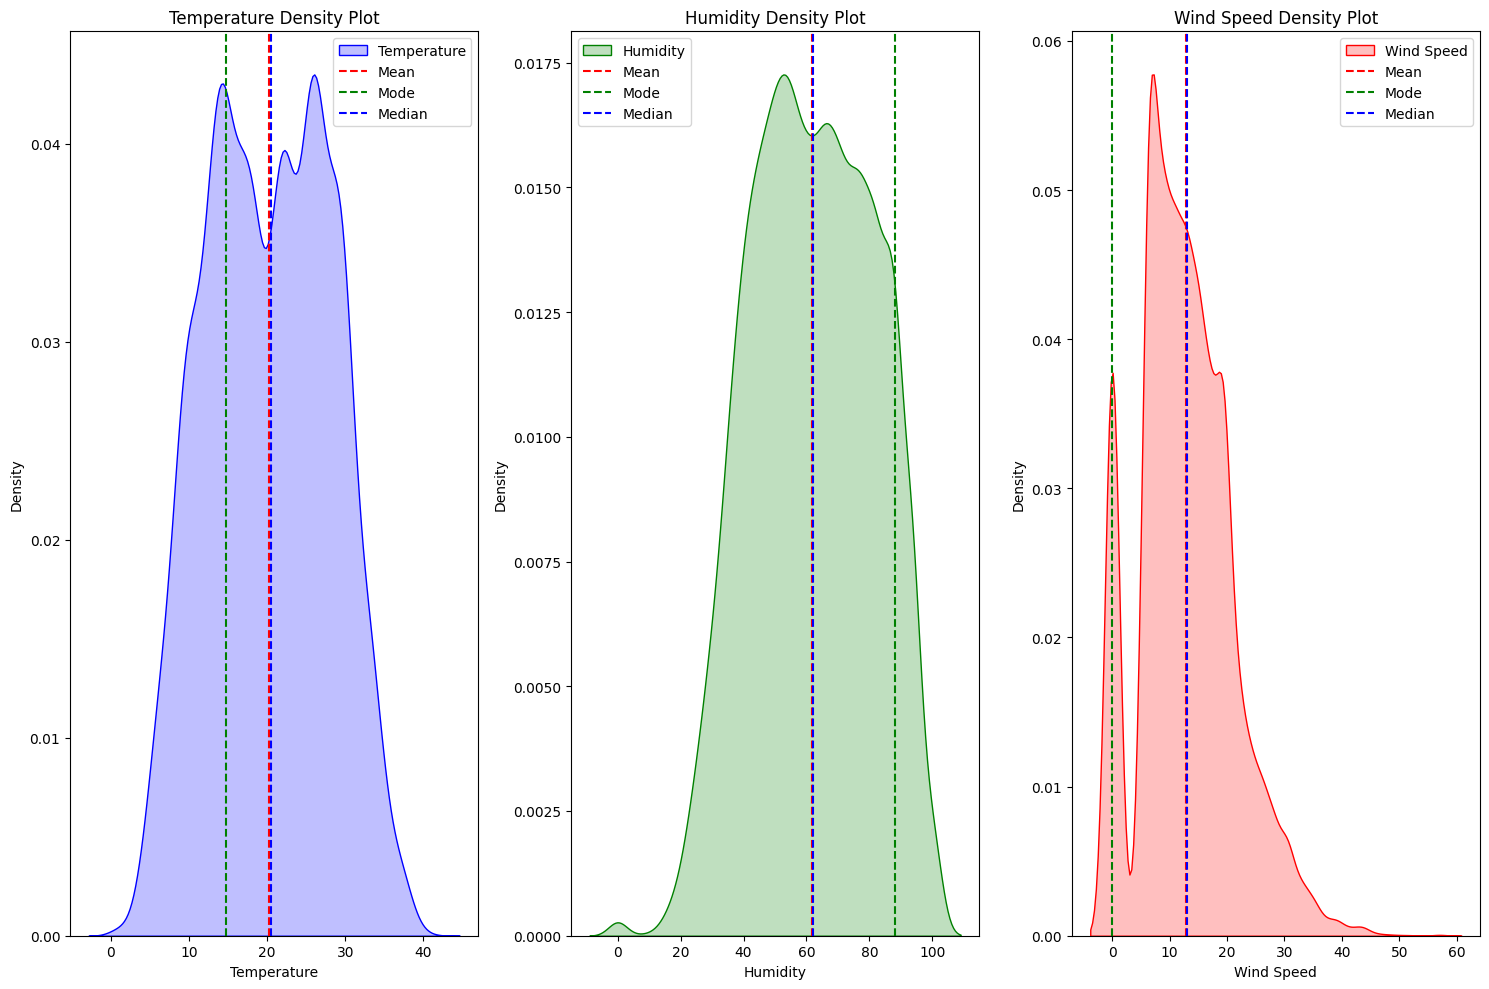

In [ ]:

# Density plot for temp
plt.figure(figsize= (15,10))
plt.subplot(1, 3, 1)
sns.kdeplot(df['temp'], shade=True, color='blue', label='Temperature')
plt.axvline(df['temp'].mean(), color='r', linestyle='--', label='Mean')
plt.axvline(df['temp'].mode().values[0], color='g', linestyle='--', label='Mode')
plt.axvline(df['temp'].median(), color='b', linestyle='--', label='Median')
plt.title('Temperature Density Plot')
plt.xlabel('Temperature')
plt.ylabel('Density')
plt.legend()


# Density plot for humidity
plt.subplot(1, 3, 2)
sns.kdeplot(df['humidity'], shade=True, color='green', label='Humidity')
plt.axvline(df['humidity'].mean(), color='r', linestyle='--', label='Mean')
plt.axvline(df['humidity'].mode().values[0], color='g', linestyle='--', label='Mode')
plt.axvline(df['humidity'].median(), color='b', linestyle='--', label='Median')
plt.title('Humidity Density Plot')
plt.xlabel('Humidity')
plt.ylabel('Density')
plt.legend()

# Density plot for wind speed
plt.subplot(1, 3, 3)
sns.kdeplot(df['windspeed'], shade=True, color='red', label='Wind Speed')
plt.axvline(df['windspeed'].mean(), color='r', linestyle='--', label='Mean')
plt.axvline(df['windspeed'].mode().values[0], color='g', linestyle='--', label='Mode')
plt.axvline(df['windspeed'].median(), color='b', linestyle='--', label='Median')
plt.title('Wind Speed Density Plot')
plt.xlabel('Wind Speed')
plt.ylabel('Density')
plt.legend()


plt.tight_layout()

**Inference:** In all the three distributions we have equal mean and median representing that the graphs might be pretty close to being symmetric around the central value.


However, mode was fluctuating denoting that continuous variables like "Temperature" and "Wind speed" are right skewed, meaning that the 'mode' was less than their 'mean'. Thus, its evident that data points from both variables (temperature and windspeed) have been majorily clusterd towards left side of the distribution and have some extreme values extending to the right side. But if we go deeper we can also observe that right skewness of Temperature variable was not that strong and pretty much resulting of being symmetric than rest of the other two.

Similarly, looking at the graph of "humidity", we can observe that 'mode' was much greater than 'mean' resulting into left skewness. Here, the data points have been majorily clustered towards right side of the dstribution and have some extreme values extending to the left side.

<--------------------------------------------------------------------------------------------> <-------------------------------------------------------------------------------------------->


2. Influence within each independent variables on total bike rentals

In [ ]:
total_rental_bikes_under_workingday = df.groupby("workingday")["count"].sum()
total_rental_bikes_under_workingday = total_rental_bikes_under_workingday.reset_index(name = "sum_of_rental_bikes")
total_rental_bikes_under_workingday

,workingday,sum_of_rental_bikes
0,0,654872
1,1,1430604


In [ ]:
total_rental_bikes_under_weather = df.groupby("weather")["count"].sum()
total_rental_bikes_under_weather = total_rental_bikes_under_weather.reset_index(name = "sum_of_rental_bikes")
total_rental_bikes_under_weather

,weather,sum_of_rental_bikes
0,1,1476063
1,2,507160
2,3,102089
3,4,164


In [ ]:
total_rental_bikes_under_season = df.groupby("season")["count"].sum()
total_rental_bikes_under_season = total_rental_bikes_under_season.reset_index(name = "sum_of_rental_bikes")
total_rental_bikes_under_season

,season,sum_of_rental_bikes
0,1,312498
1,2,588282
2,3,640662
3,4,544034


Bivariate realtionship of each independent variable

<ipython-input-47-89b9805fc4ed>:3: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:red'` for the same effect.

  sns.barplot(data = total_rental_bikes_under_workingday, x = "workingday", y = "sum_of_rental_bikes", hue = "workingday", color = "red", width = 0.5)


Text(0.5, 1.0, 'count of total rental bikes grouped under season')

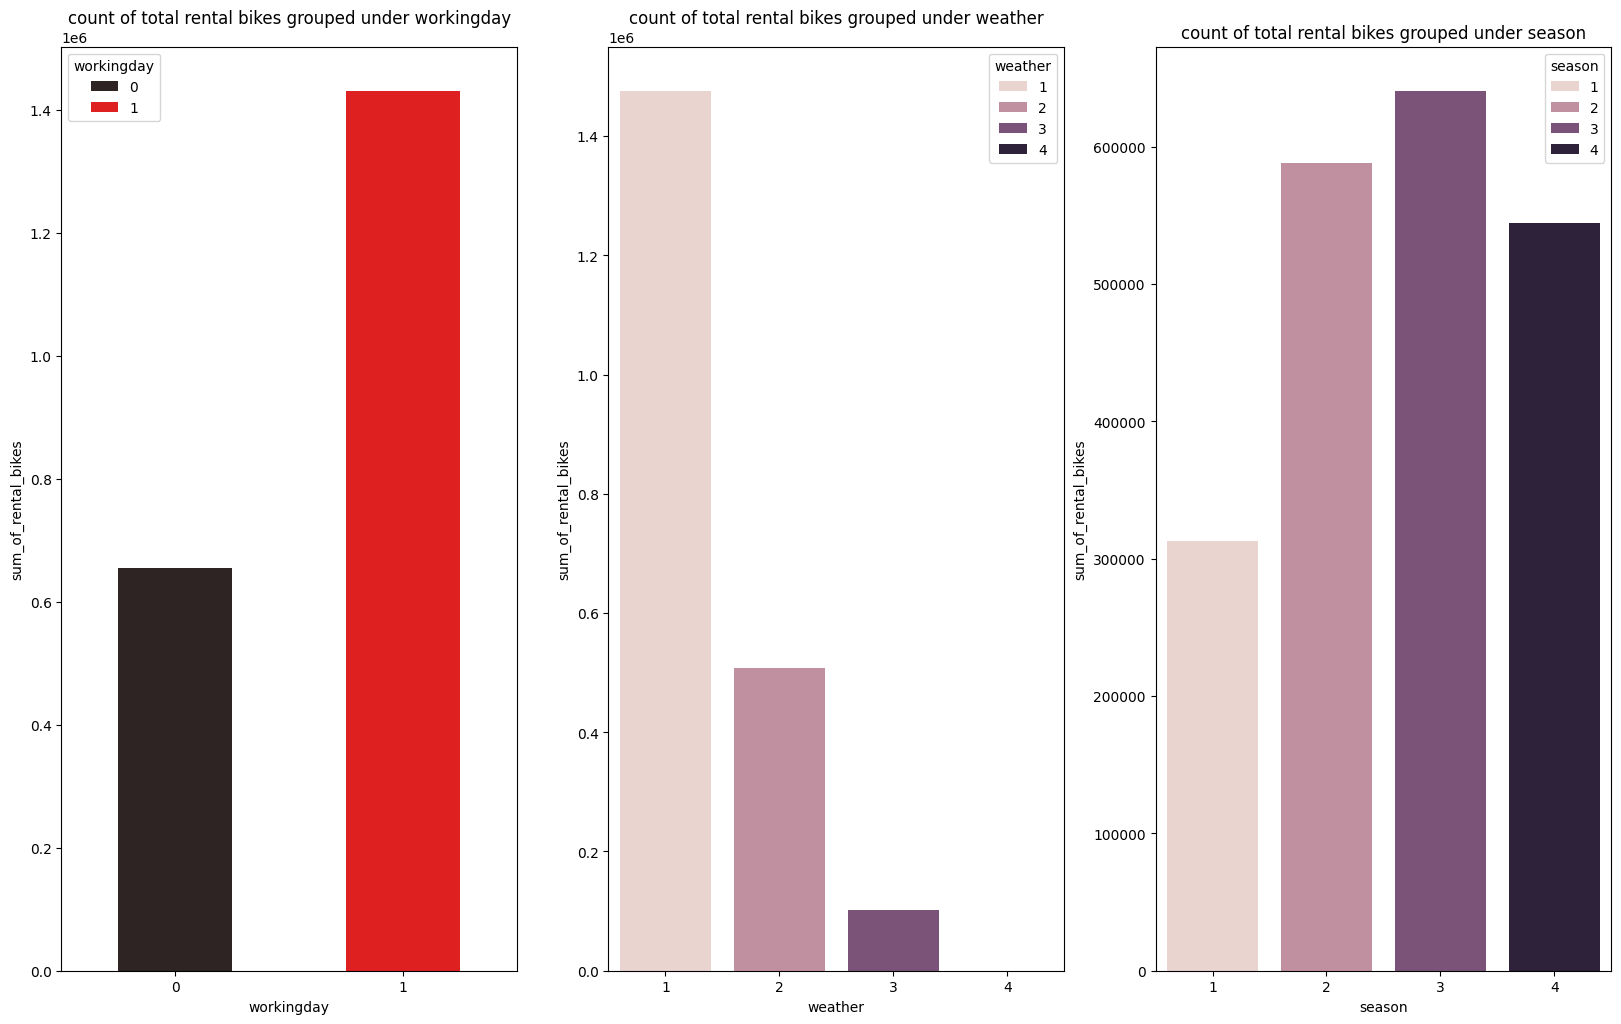

In [ ]:
plt.figure(figsize = (20, 12))
plt.subplot(1,3,1)
sns.barplot(data = total_rental_bikes_under_workingday, x = "workingday", y = "sum_of_rental_bikes", hue = "workingday", color = "red", width = 0.5)
plt.title("count of total rental bikes grouped under workingday")

plt.subplot(1,3,2)
sns.barplot(data = total_rental_bikes_under_weather, x = "weather", y = "sum_of_rental_bikes", hue = "weather")
plt.title("count of total rental bikes grouped under weather")

plt.subplot(1,3,3)
sns.barplot(data = total_rental_bikes_under_season, x = "season", y = "sum_of_rental_bikes", hue = "season")
plt.title("count of total rental bikes grouped under season")


**Inference:** From the above graphs we can conclude that, total count of bike rentals was pretty much higher in workingday than holiday;  Total bike rentals count in weather category 1 is way higher than rest of other three weather patterns; And total bike rentals during season 3 is stood at top and then followed by season 2 and season 4.

<--------------------------------------------------------------------------------------------> <-------------------------------------------------------------------------------------------->


3. Tests conducted to esatblish relationship between means of rental bikes usage across three individual independent variables.

(i) Indpendent two sample T_test vs two sample Z_test results on determining "workingday vs holiday" affect on count variable.

In [ ]:
from statsmodels.stats import weightstats as stests
from scipy.stats import ttest_ind

working_day_count = df[df["workingday"] == 1]["count"]
holiday_day_count = df[df["workingday"] == 0]["count"]

In [ ]:
# HO: The mean rental bikes usage difference between working-days and holidays is equal
# H1: The mean rental bikes usage difference between working-days and holidays is not equal

alpha = 0.05
z_stat, p_value = stests.ztest(working_day_count, holiday_day_count, value = 0, alternative = "two-sided")
print("z_stat :", z_stat, ",", "p_value :", p_value)

print("<----------------------------------------->")

if p_value < alpha:
  print("reject the null hypothesis : There is significant mean difference of rental bikes usage between working-days and holidays")
else:
  print("unable to reject null hypothesis : This high difference might also exist under the assumption of null hypothesis being true")

z_stat : 1.2096277376026694 , p_value : 0.22642176970306893
<----------------------------------------->
unable to reject null hypothesis : This high difference might also exist under the assumption of null hypothesis being true


In [ ]:
# HO: The mean rental bikes usage difference between working-days and holidays is equal
# H1: The mean rental bikes usage difference between working-days and holidays is not equal

alpha = 0.05
t_stat, p_value = ttest_ind(working_day_count, holiday_day_count, alternative = "two-sided")
print("t_stat :", t_stat, ",", "p_value :", p_value)

print("<----------------------------------------->")

if p_value < alpha:
  print("reject the null hypothesis : There is significant mean difference of rental bikes usage between working-days and holidays")
else:
  print("unable to reject null hypothesis : This high difference might also exist under the assumption of null hypothesis being true")

t_stat : 1.2096277376026694 , p_value : 0.22644804226361348
<----------------------------------------->
unable to reject null hypothesis : This high difference might also exist under the assumption of null hypothesis being true


**Inference:** By using both t_test and z_test for evaluating the affect of workingday on total bike retals, we can conclude from both the tests that there was no influence or significant mean difference resulting within the groups because, p_value was much higher than alpha level; meaning we do not have sufficient evidence to claim that there was a difference beyond what could occur by random chance.

.............................................................

.............................................................

.............................................................

(ii) Determining whether means of bikes rentals usage around different seasons are equal or not.

(a) I am Using levene and shapiro to conduct tests of normality and equality of variance between different seasonal conditions in order to validate whether to conduct Anova or not.

In [ ]:
spring = df[df["season"] == 1]["count"]
summer = df[df["season"] == 2]["count"]
fall = df[df["season"] == 3]["count"]
winter = df[df["season"] == 4]["count"]

In [ ]:
from scipy.stats import shapiro
from scipy.stats import levene
alpha = 0.05

## under shapiro test,
# HO: The data is normally distributed
# H1: The data is not normally distributed

## under levene test,
# HO: The variances are equal across seasons
# H1: The variances are different acorss seasons


stat1, p_value1 = shapiro(spring)
stat2, p_value2 = shapiro(summer)
stat3, p_value3 = shapiro(fall)
stat4, p_value4 = shapiro(winter)

print("stat1 :", stat1, "p_value1 :", p_value1)
print("stat2 :", stat2, "p_value2 :", p_value2)
print("stat3 :", stat3, "p_value3 :", p_value3)
print("stat4 :", stat4, "p_value4 :", p_value4)

if p_value1 < alpha or p_value2 < alpha or p_value3 < alpha or p_value4 < alpha:
  print("reject the null hypothesis : There is no normality in the seasons rental bike usage")
else:
  print("unable to reject null hypothesis : There is normality in the seasons rental bike usage")

print("<---------------------->")
print("<---------------------->")

l_stat, p_value = levene(spring, summer, fall, winter)
print("l_stat :", l_stat, "p_value :", p_value)

print("<----------------------------------------->")

if p_value < alpha:
  print("reject the null hypothesis : There is no equality in variances between seasons rental bike usage")
else:
  print("unable to reject null hypothesis : There is equality in variances between seasons rental bike usage")


stat1 : 0.8087388873100281 p_value1 : 0.0
stat2 : 0.900481641292572 p_value2 : 6.039093315091269e-39
stat3 : 0.9148160815238953 p_value3 : 1.043458045587339e-36
stat4 : 0.8954644799232483 p_value4 : 1.1301682309549298e-39
reject the null hypothesis : There is no normality in the seasons rental bike usage
<---------------------->
<---------------------->
l_stat : 187.7706624026276 p_value : 1.0147116860043298e-118
<----------------------------------------->
reject the null hypothesis : There is no equality in variances between seasons rental bike usage


----> As normality and equality of variance using shapiro & levene tests on season varible was not satisfied; we now use "kruskal", an alternative to Anova.

In [ ]:
from scipy.stats import kruskal
alpha = 0.05

# HO: The means of rental bikes usage of different seasons are equal
# H1: The means of rental bikes usage of differnet seasons are not equal

k_stat, p_value = kruskal(spring, summer, fall, winter)
print("k_stat :", k_stat, ",", "p_value :", p_value)

print("<----------------------------------------->")

if p_value < alpha:
  print("reject the null hypothesis : There is significant mean difference of rental bikes usage between different seasons")
else:
  print("unable to reject null hypothesis : This high difference might also exist under the assumption of null hypothesis being true")

k_stat : 699.6668548181988 , p_value : 2.479008372608633e-151
<----------------------------------------->
reject the null hypothesis : There is significant mean difference of rental bikes usage between different seasons


**Infernece:** By using kruskal, we can come to a conclusion that bikes usage was fluctuating across all the four seasons. There was no equality between them. Does finding and focussing on particular top two seasons by conducting futher hypothesis testing and framing right strategies which caters to them should ultimately benefit the long term prosperity of business.

(b) Repeated the same above process by considering only registered users

In [ ]:
re_spring = df[df["season"] == 1]["registered"]
re_summer = df[df["season"] == 2]["registered"]
re_fall = df[df["season"] == 3]["registered"]
re_winter = df[df["season"] == 4]["registered"]

In [ ]:
from scipy.stats import shapiro
from scipy.stats import levene
alpha = 0.05

## under shapiro test,
# HO: The data is normally distributed
# H1: The data is not normally distributed

## under levene test,
# HO: The variances are equal across seasons
# H1: The variances are different acorss seasons


stat1, p_value1 = shapiro(re_spring)
stat2, p_value2 = shapiro(re_summer)
stat3, p_value3 = shapiro(re_fall)
stat4, p_value4 = shapiro(re_winter)

print("stat1 :", stat1, "p_value1 :", p_value1)
print("stat2 :", stat2, "p_value2 :", p_value2)
print("stat3 :", stat3, "p_value3 :", p_value3)
print("stat4 :", stat4, "p_value4 :", p_value4)

if p_value1 < alpha or p_value2 < alpha or p_value3 < alpha or p_value4 < alpha:
  print("reject the null hypothesis : There is no normality in the seasons rental bike usage")
else:
  print("unable to reject null hypothesis : There is normality in the seasons rental bike usage")

print("<---------------------->")
print("<---------------------->")

l_stat, p_value = levene(re_spring, re_summer, re_fall, re_winter)
print("l_stat :", l_stat, "p_value :", p_value)

print("<----------------------------------------->")

if p_value < alpha:
  print("reject the null hypothesis : There is no equality in variances between seasons rental bike usage")
else:
  print("unable to reject null hypothesis : There is equality in variances between seasons rental bike usage")


stat1 : 0.8068912625312805 p_value1 : 0.0
stat2 : 0.875313401222229 p_value2 : 2.598007352858211e-42
stat3 : 0.8749604225158691 p_value3 : 2.352780121601368e-42
stat4 : 0.8786174654960632 p_value4 : 6.565083305361768e-42
reject the null hypothesis : There is no normality in the seasons rental bike usage
<---------------------->
<---------------------->
l_stat : 116.3420701074739 p_value : 3.696231945833219e-74
<----------------------------------------->
reject the null hypothesis : There is no equality in variances between seasons rental bike usage


In [ ]:
from scipy.stats import kruskal
alpha = 0.05

# HO: The means of rental bikes usage of different seasons are equal
# H1: The means of rental bikes usage of differnet seasons are not equal

k_stat, p_value = kruskal(re_spring, re_summer, re_fall, re_winter)
print("k_stat :", k_stat, ",", "p_value :", p_value)

print("<----------------------------------------->")

if p_value < alpha:
  print("reject the null hypothesis : There is significant mean difference of rental bikes usage between different seasons")
else:
  print("unable to reject null hypothesis : This high difference might also exist under the assumption of null hypothesis being true")

k_stat : 542.9283509737561 , p_value : 2.3698212326776174e-117
<----------------------------------------->
reject the null hypothesis : There is significant mean difference of rental bikes usage between different seasons


Inference: Similar results or patterns were observed in registered users when compared them to that of Total users.

.............................................................

.............................................................

.............................................................

(iii) Determining whether means of different seasons bikes usage are equal or not.

(a) I am Using levene and shapiro to conduct tests of normality and equality of variance between different weather patterns in order to validate whether to conduct Anova or not.

In [ ]:
weather_category_1 = df[df["weather"] == 1]["count"]
weather_category_2  = df[df["weather"] == 2]["count"]
weather_category_3 = df[df["weather"] == 3]["count"]
weather_category_4  = df[df["weather"] == 4]["count"]

In [ ]:
#Assumption: Weather category 4 is not included beacause there is no bike usage data related to it
## under shapiro test,
# HO: The data is normally distributed
# H1: The data is not normally distributed

## under levene test,
# HO: The variances are equal across seasons
# H1: The variances are different acorss seasons


stat1, p_value1 = shapiro(weather_category_1)
stat2, p_value2 = shapiro(weather_category_2)
stat3, p_value3 = shapiro(weather_category_3)

print("stat1 :", stat1, "p_value1 :", p_value1)
print("stat2 :", stat2, "p_value2 :", p_value2)
print("stat3 :", stat3, "p_value3 :", p_value3)

if p_value1 < alpha or p_value2 < alpha or p_value3 < alpha:
  print("reject the null hypothesis : There is no normality in the rental bike usage of different weather conditions")
else:
  print("unable to reject null hypothesis : There is normality in the rental bike usage of different weather conditions")

print("<---------------------->")
print("<---------------------->")

l_stat, p_value = levene(weather_category_1, weather_category_2, weather_category_3)
print("l_stat :", l_stat, "p_value :", p_value)

print("<----------------------------------------->")

if p_value < alpha:
  print("reject the null hypothesis : There is no equality in variances between rental bike usage based on different weather conditions")
else:
  print("unable to reject null hypothesis : There is equality in variances between rental bike usage based on different weather conditions")


stat1 : 0.8909230828285217 p_value1 : 0.0
stat2 : 0.8767687082290649 p_value2 : 9.781063280987223e-43
stat3 : 0.7674332857131958 p_value3 : 3.876090133422781e-33
reject the null hypothesis : There is no normality in the rental bike usage of different weather conditions
<---------------------->
<---------------------->
l_stat : 81.67574924435011 p_value : 6.198278710731511e-36
<----------------------------------------->
reject the null hypothesis : There is no equality in variances between rental bike usage based on different weather conditions


/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


----> As normality and equality of variance using shapiro & levene tests on weather patterns variable was not satisfied; we now use "kruskal", an alternative to Anova.

In [ ]:
# HO: The means of rental bikes usage of different weathers patterns are equal
# H1: The means of rental bikes usage of differnet weathers patterns are not equal

k_stat, p_value = kruskal(weather_category_1, weather_category_2, weather_category_3, weather_category_4)
print("k_stat :", k_stat, ",", "p_value :", p_value)

print("<----------------------------------------->")

if p_value < alpha:
  print("reject the null hypothesis : There is significant mean difference of rental bikes usage between different weather patterns")
else:
  print("unable to reject null hypothesis : This high difference might also exist under the assumption of null hypothesis being true")

k_stat : 205.00216514479087 , p_value : 3.501611300708679e-44
<----------------------------------------->
reject the null hypothesis : There is significant mean difference of rental bikes usage between different weather patterns


**Infernece:** By using kruskal, we can come to a conclusion that bikes usage was fluctuating across all the four weather patterns. There was no equality between them. Does finding and focussing on particular top two weather conditions by conducting futher hypothesis testing and framing right strategies which caters to them should ultimately benefit the long term prosperity of business.

(b) Repeated the same above process by considering only registered users

In [ ]:
re_weather_category_1 = df[df["weather"] == 1]["registered"]
re_weather_category_2  = df[df["weather"] == 2]["registered"]
re_weather_category_3 = df[df["weather"] == 3]["registered"]
re_weather_category_4  = df[df["weather"] == 4]["registered"]

In [ ]:
#Assumption: Weather category 4 is not included beacause there is no bike usage data related to it
## under shapiro test,
# HO: The data is normally distributed
# H1: The data is not normally distributed

## under levene test,
# HO: The variances are equal across seasons
# H1: The variances are different acorss seasons


stat1, p_value1 = shapiro(re_weather_category_1)
stat2, p_value2 = shapiro(re_weather_category_2)
stat3, p_value3 = shapiro(re_weather_category_3)

print("stat1 :", stat1, "p_value1 :", p_value1)
print("stat2 :", stat2, "p_value2 :", p_value2)
print("stat3 :", stat3, "p_value3 :", p_value3)

if p_value1 < alpha or p_value2 < alpha or p_value3 < alpha:
  print("reject the null hypothesis : There is no normality in the rental bike usage of different weather conditions")
else:
  print("unable to reject null hypothesis : There is normality in the rental bike usage of different weather conditions")

print("<---------------------->")
print("<---------------------->")

l_stat, p_value = levene(re_weather_category_1, re_weather_category_2, re_weather_category_3)
print("l_stat :", l_stat, "p_value :", p_value)

print("<----------------------------------------->")

if p_value < alpha:
  print("reject the null hypothesis : There is no equality in variances between rental bike usage based on different weather conditions")
else:
  print("unable to reject null hypothesis : There is equality in variances between rental bike usage based on different weather conditions")


stat1 : 0.8689420223236084 p_value1 : 0.0
stat2 : 0.8497174382209778 p_value2 : 1.401298464324817e-45
stat3 : 0.7499492168426514 p_value3 : 4.471773824247394e-34
reject the null hypothesis : There is no normality in the rental bike usage of different weather conditions
<---------------------->
<---------------------->
l_stat : 51.13604558028773 p_value : 7.86334408573682e-23
<----------------------------------------->
reject the null hypothesis : There is no equality in variances between rental bike usage based on different weather conditions


In [ ]:
# HO: The means of rental bikes usage of different weathers patterns are equal
# H1: The means of rental bikes usage of differnet weathers patterns are not equal

k_stat, p_value = kruskal(re_weather_category_1, re_weather_category_2, re_weather_category_3, re_weather_category_4)
print("k_stat :", k_stat, ",", "p_value :", p_value)

print("<----------------------------------------->")

if p_value < alpha:
  print("reject the null hypothesis : There is significant mean difference of rental bikes usage between different weather patterns")
else:
  print("unable to reject null hypothesis : This high difference might also exist under the assumption of null hypothesis being true")

k_stat : 173.90759520169638 , p_value : 1.8239836388365876e-37
<----------------------------------------->
reject the null hypothesis : There is significant mean difference of rental bikes usage between different weather patterns


Inference: Similar results or patterns were observed in registered users when compared them to that of Total users.

<--------------------------------------------------------------------------------------------> <-------------------------------------------------------------------------------------------->

4. Even though assumptiosns like normality and equality of variance do not satisfy for variables like "season" and "weather" to conduct Anova; But still let us consider conducting it for identifying the changes that we could observe in p_values.

(i) (a)Conducting Anova for seasons to check the difference between the groups

In [ ]:
from scipy.stats import f_oneway

alpha = 0.05

# HO: The means of bikes usage between different seasons would be equal
# H1: The means of bikes usage between different seasons would be not equal

spring = df[df["season"] == 1]["count"]
summer = df[df["season"] == 2]["count"]
fall = df[df["season"] == 3]["count"]
winter = df[df["season"] == 4]["count"]

f_stat, p_value = f_oneway(spring, summer, fall, winter)
print("f_stat :", f_stat, ",", "P_value :", p_value)

print("<----------------------------------------->")

if p_value < alpha:
  print("reject the null hypothesis : There is significant mean difference of rental bikes usage between different seasons")
else:
  print("unable to reject null hypothesis : This high difference might also exist under the assumption of null hypothesis being true")

f_stat : 236.94671081032106 , P_value : 6.164843386499654e-149
<----------------------------------------->
reject the null hypothesis : There is significant mean difference of rental bikes usage between different seasons


(b) Repeating the same test for only registered users

In [ ]:
re_spring = df[df["season"] == 1]["registered"]
re_summer = df[df["season"] == 2]["registered"]
re_fall = df[df["season"] == 3]["registered"]
re_winter = df[df["season"] == 4]["registered"]

f_stat, p_value = f_oneway(re_spring, re_summer, re_fall, re_winter)
print("f_stat :", f_stat, ",", "P_value :", p_value)

print("<----------------------------------------->")
if p_value < alpha:
  print("reject the null hypothesis : There is significant mean difference of rental bikes usage between different seasons")
else:
  print("unable to reject null hypothesis : This high difference might also exist under the assumption of null hypothesis being true")

f_stat : 167.97539126005708 , P_value : 1.8882994650328087e-106
<----------------------------------------->
reject the null hypothesis : There is significant mean difference of rental bikes usage between different seasons


**Infernece:** Though the P-values are more significant and lower; ultimately contributing to reject the null hypothesis, but still they cannot be categorized as right numbers becasue the assumptions like normality and equality of variance between groups was not observed.

..............................................................

..............................................................

..............................................................

(ii) (a) Conducting Anova for weather patterns to check the difference between the groups

In [ ]:
# HO: The means of bikes usage between different weather patterns would be equal
# H1: The means of bikes usage between different weather patterns would be not equal

alpha = 0.05

weather_category_1 = df[df["weather"] == 1]["count"]
weather_category_2  = df[df["weather"] == 2]["count"]
weather_category_3 = df[df["weather"] == 3]["count"]
weather_category_4  = df[df["weather"] == 4]["count"]

f_stat, p_value = f_oneway(weather_category_1,  weather_category_2 , weather_category_3, weather_category_4)
print("f_stat :", f_stat, ",", "P_value :", p_value)

print("<----------------------------------------->")

if p_value < alpha:
  print("reject the null hypothesis : There is significant mean difference of rental bikes usage between different weather patterns")
else:
  print("unable to reject null hypothesis : This high difference might also exist under the assumption of null hypothesis being true")

f_stat : 65.53024112793271 , P_value : 5.482069475935669e-42
<----------------------------------------->
reject the null hypothesis : There is significant mean difference of rental bikes usage between different weather patterns


(b) Repeating the same test for only registered *users*

In [ ]:
re_weather_category_1 = df[df["weather"] == 1]["registered"]
re_weather_category_2  = df[df["weather"] == 2]["registered"]
re_weather_category_3 = df[df["weather"] == 3]["registered"]
re_weather_category_4  = df[df["weather"] == 4]["registered"]

f_stat, p_value = f_oneway(re_weather_category_1,  re_weather_category_2 , re_weather_category_3, re_weather_category_4)
print("f_stat :", f_stat, ",", "P_value :", p_value)

print("<----------------------------------------->")

if p_value < alpha:
  print("reject the null hypothesis : There is significant mean difference of rental bikes usage between different weather patterns")
else:
  print("unable to reject null hypothesis : This high difference might also exist under the assumption of null hypothesis being true")

f_stat : 48.93397612585586 , P_value : 2.0932747272621856e-31
<----------------------------------------->
reject the null hypothesis : There is significant mean difference of rental bikes usage between different weather patterns


**Infernece:** Though the P-values were more significant and lower; ultimately contributing to reject the null hypothesis, but still they cannot be categorized as right numbers becasue the assumptions like normality and equality of variance between groups was not observed.

<--------------------------------------------------------------------------------------------> <-------------------------------------------------------------------------------------------->

5. Conducting chisquare test of independence to check whether there is any dependency between season and weather patterns

In [ ]:
from scipy.stats import chi2_contingency

# H0: There is independency between season and weather
# H1: There is dependency between season and weather

# Construct a contingency table
contingency_table = pd.crosstab(df.season, df.weather)
print(contingency_table)

print("<--------------------------------->")
print("<--------------------------------->")

# Perform chi-square test of independence
chi2, p_value, dof, expected_values = chi2_contingency(contingency_table)

# Print results
print("Chi-square statistic:", chi2)
print("p-value:", p_value)
print("Degrees of freedom:", dof)
print("Expected frequencies table:")
print(expected_values)

print("<--------------------------------->")

# Interpret the results
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant association between weather and season (dependency exists).")
else:
    print("Fail to reject the null hypothesis: There is no significant association between weather and season (independency exists).")


weather     1    2    3  4
season                    
1        1759  715  211  1
2        1801  708  224  0
3        1930  604  199  0
4        1702  807  225  0
<--------------------------------->
<--------------------------------->
Chi-square statistic: 49.158655596893624
p-value: 1.549925073686492e-07
Degrees of freedom: 9
Expected frequencies table:
[[1.77454639e+03 6.99258130e+02 2.11948742e+02 2.46738931e-01]
 [1.80559765e+03 7.11493845e+02 2.15657450e+02 2.51056403e-01]
 [1.80559765e+03 7.11493845e+02 2.15657450e+02 2.51056403e-01]
 [1.80625831e+03 7.11754180e+02 2.15736359e+02 2.51148264e-01]]
<--------------------------------->
Reject the null hypothesis: There is a significant association between weather and season (dependency exists).


**Infernece:** We all know that weather depends upon season.
It's only based on season, weather conditions alter and change. Yet, In very rare instances we tend to observe certain deviations in weather patterns not corroborating with the season, however still majority of weather conditions are fluctuating beacause of changes in seasons.

And now, the same kind of dependency relationship was also observed in this dataset between season and weather categories.

<--------------------------------------------------------------------------------------------> <-------------------------------------------------------------------------------------------->

6. Conducting advance Hypothesis (ols) and spearmen rank corr for continuous and independent variables vs one dependent variable "count"

---> Asumptiosn of normality and equality of variance do not satisfy, but still conducting ols test.

Continuous variables

In [ ]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

(i) count vs humidity

In [ ]:
test = ols('count ~ C(humidity)', data = df).fit()

anova_table = sm.stats.anova_lm(test, typ = 1)

print(anova_table)


                  df        sum_sq        mean_sq         F         PR(>F)
C(humidity)     88.0  4.651380e+07  528565.886167  18.37038  4.163831e-258
Residual     10797.0  3.106591e+08   28772.725358       NaN            NaN


In [ ]:
from scipy.stats import spearmanr

# HO: There is no correlation between count and humidity
# H1: There is correlation between count and humidity

# Calculating Spearman's rank correlation coefficient
spearman_corr, p_value = spearmanr(df['count'], df['humidity'])

print("Spearman's rank correlation coefficient:", spearman_corr)
print("P-value:", p_value)

print("<--------------------------------->")

if p_value < alpha:
    print("Reject the null hypothesis: There is a significant correlation between count and humidity.")
else:
    print("Fail to reject the null hypothesis: There is is no correlation between count and humidity")


Spearman's rank correlation coefficient: -0.3540491220175611
P-value: 0.0
<--------------------------------->
Reject the null hypothesis: There is a significant correlation between count and humidity.


**Inference:** If we observe the negative corr betweeen humidity and count variable, it was more or less evident that less humid conditions will be favourable to increase the demand for our shared rental cycles

But still the negative corr, was not that strong; meaning that there are other important variables which could be also affecting the count varible.

(ii) count vs atemp

In [ ]:
test = ols('count ~ C(atemp)', data = df).fit()

anova_table = sm.stats.anova_lm(test, typ = 1)

print(anova_table)

               df        sum_sq       mean_sq         F  PR(>F)
C(atemp)     59.0  6.479027e+07  1.098140e+06  40.66064     0.0
Residual  10826.0  2.923826e+08  2.700745e+04       NaN     NaN


In [ ]:
# HO: There is no correlation between count and atemp
# H1: There is correlation between count and atemp

# Calculating Spearman's rank correlation coefficient
spearman_corr, p_value = spearmanr(df['count'], df['atemp'])

print("Spearman's rank correlation coefficient:", spearman_corr)
print("P-value:", p_value)

print("<--------------------------------->")

if p_value < alpha:
    print("Reject the null hypothesis: There is a significant correlation between count and atemp.")
else:
    print("Fail to reject the null hypothesis: There is is no correlation between count and atemp")


Spearman's rank correlation coefficient: 0.40656175392045846
P-value: 0.0
<--------------------------------->
Reject the null hypothesis: There is a significant correlation between count and atemp.


**Inference:** Observing the spermen rank corr between count and atemp variables, it was more or less evident that there was a positive relationship between the variables; meaning if atemp was increasing, then there was also a slight increase in cycles demand, but for real assessment we have to consider even some other variables for making a reliable conclusion.

(iii) count vs windspeed

In [ ]:
test = ols('count ~ C(windspeed)', data = df).fit()

anova_table = sm.stats.anova_lm(test, typ = 1)

print(anova_table)

                   df        sum_sq        mean_sq         F        PR(>F)
C(windspeed)     27.0  6.767861e+06  250661.511834  7.767247  7.529783e-30
Residual      10858.0  3.504051e+08   32271.601847       NaN           NaN


In [ ]:
# HO: There is no correlation between count and windspeed
# H1: There is correlation between count and windspeed

# Calculating Spearman's rank correlation coefficient
spearman_corr, p_value = spearmanr(df['count'], df['windspeed'])

print("Spearman's rank correlation coefficient:", spearman_corr)
print("P-value:", p_value)

print("<--------------------------------->")

if p_value < alpha:
    print("Reject the null hypothesis: There is a significant correlation between count and windspeed.")
else:
    print("Fail to reject the null hypothesis: There is is no correlation between count and windspeed")


Spearman's rank correlation coefficient: 0.1357773747113304
P-value: 5.9015220272171205e-46
<--------------------------------->
Reject the null hypothesis: There is a significant correlation between count and windspeed.


**Inference:** Observing the relationship between windspeed and count variables, we can comment that there was a negligible positive relationship; However the effect of this result was not relaible and impactful. Thus, we can conclude that the wind speed has less impact on cycles demand than other continuous variables.

**Overall Inference:** Here, we could observe that p_value in every continuous variable was less than alpha level, thus this signifies that they do have an influence on rental bike usage. Though these stats will not give us the full picture of how much actual influence they have, but still combinely they might stand a great number vice versa to independent variables like season, weather and workingday.

To get a full picture, looking at f-stat, and overall p_value statistic by combining all three variables gives us the true picture.

...........................................................
...........................................................
...........................................................

Independent variables

In [ ]:
alpha = 0.05

# HO: There is no relationship betweeen dependent and independent variables
# H1: There is a signifiant relationship between dependent and independent varibales

test = ols('count ~ C(workingday) * C(weather) * C(season)', data = df).fit()

print(test.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.082
Model:                            OLS   Adj. R-squared:                  0.080
Method:                 Least Squares   F-statistic:                     40.20
Date:                Wed, 20 Mar 2024   Prob (F-statistic):          6.26e-180
Time:                        07:13:15   Log-Likelihood:                -71582.
No. Observations:               10886   AIC:                         1.432e+05
Df Residuals:                   10861   BIC:                         1.434e+05
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                                                        coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------

**Inference:** The combined summary table of independent variables denotes that there was significant difference between seasons, weather patterns, workingday and 'Count' variable.

We have very low 'p_value' than alpha and high 'f_stat' contributing to difference of means within each indepdent variable.

In [ ]:
# HO: There is no relationship betweeen dependent and independent variables
# H1: There is a signifiant relationship between dependent and independent varibales

test = ols('count ~ C(workingday) * C(weather) * C(season)', data = df).fit()

anova_table = sm.stats.anova_lm(test, typ = 3)

print(anova_table)

print("<----------------------------------------->")

alpha = 0.05

if p_value < alpha:
    print("Reject the null hypothesis: There is a significant association between independent and dependent variables (dependency exists).")
else:
    print("Fail to reject the null hypothesis: There is no significant association between the independent and dependent variables (independency exists).")

print("<----------------------------------------->")
print("<----------------------------------------->")



                                          sum_sq       df           F  \
Intercept                           8.149616e+06      1.0  269.830911   
C(workingday)                       1.682331e+04      1.0    0.557014   
C(weather)                          5.304915e+05      3.0    5.854796   
C(season)                           5.562554e+06      3.0   61.391401   
C(workingday):C(weather)            7.052205e+04      3.0    0.778320   
C(workingday):C(season)             1.636489e+05      3.0    1.806119   
C(weather):C(season)                3.037499e+05      9.0    1.117450   
C(workingday):C(weather):C(season)  3.859605e+05      9.0    1.419891   
Residual                            3.280313e+08  10861.0         NaN   

                                          PR(>F)  
Intercept                           6.502632e-60  
C(workingday)                       4.554820e-01  
C(weather)                          5.443133e-04  
C(season)                           2.374949e-39  
C(workingday):

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:1896: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 9, but rank is 6
  warnings.warn('covariance of constraints does not have full '
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:1896: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 9, but rank is 6
  warnings.warn('covariance of constraints does not have full '


In [1]:
!pip install nbconvert

In [2]:
!apt-get install texlive texlive-xetex texlive-latex-extra pandoc

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
pandoc is already the newest version (2.9.2.1-3ubuntu2).
pandoc set to manually installed.
The following additional packages will be installed:
  dvisvgm fonts-droid-fallback fonts-lato fonts-lmodern fonts-noto-mono fonts-texgyre
  fonts-urw-base35 libapache-pom-java libcommons-logging-java libcommons-parent-java
  libfontbox-java libfontenc1 libgs9 libgs9-common libidn12 libijs-0.35 libjbig2dec0 libkpathsea6
  libpdfbox-java libptexenc1 libruby3.0 libsynctex2 libteckit0 libtexlua53 libtexluajit2 libwoff1
  libzzip-0-13 lmodern poppler-data preview-latex-style rake ruby ruby-net-telnet ruby-rubygems
  ruby-webrick ruby-xmlrpc ruby3.0 rubygems-integration t1utils teckit tex-common tex-gyre
  texlive-base texlive-binaries texlive-fonts-recommended texlive-latex-base
  texlive-latex-recommended texlive-pictures texlive-plain-generic tipa xfonts-encodings
  xfonts-utils
Suggested packages:
  fo

In [4]:
!jupyter nbconvert --to pdf "/content/drive/MyDrive/Colab Notebooks/Yulu-Dataset@Dhanureddy.ipynb"

[NbConvertApp] Converting notebook /content/drive/MyDrive/Colab Notebooks/Yulu-Dataset@Dhanureddy.ipynb to pdf
[NbConvertApp] Support files will be in Yulu-Dataset@Dhanureddy_files/
[NbConvertApp] Making directory ./Yulu-Dataset@Dhanureddy_files
[NbConvertApp] Making directory ./Yulu-Dataset@Dhanureddy_files
[NbConvertApp] Making directory ./Yulu-Dataset@Dhanureddy_files
[NbConvertApp] Writing 182350 bytes to notebook.tex
[NbConvertApp] Building PDF
[NbConvertApp] Running xelatex 3 times: ['xelatex', 'notebook.tex', '-quiet']
[NbConvertApp] Running bibtex 1 time: ['bibtex', 'notebook']
[NbConvertApp] WARNING | bibtex had problems, most likely because there were no citations
[NbConvertApp] PDF successfully created
[NbConvertApp] Writing 333703 bytes to /content/drive/MyDrive/Colab Notebooks/Yulu-Dataset@Dhanureddy.pdf


In [3]:
from google.colab import drive
drive.mount("/content/drive")


Mounted at /content/drive
